In [2]:
import pandas as pd
from fitter import Fitter 
import  scipy 


In [4]:
df=pd.read_csv('new1.csv')

In [5]:
df.head()

,Unnamed: 0,date,time,month,WindSpeed,WindDir
0,0,2015-01-01,00:00:00,1,2.230667,5.816667
1,1,2015-01-01,00:01:00,1,2.342167,10.050000
2,2,2015-01-01,00:02:00,1,2.362833,15.166670
3,3,2015-01-01,00:03:00,1,2.300333,15.433330
4,4,2015-01-01,00:04:00,1,2.366000,120.983299


In [6]:
df.tail()

,Unnamed: 0,date,time,month,WindSpeed,WindDir
476228,476228,2015-12-31,23:55:00,12,2.582000,14.266670
476229,476229,2015-12-31,23:56:00,12,2.486833,17.366671
476230,476230,2015-12-31,23:57:00,12,1.678167,29.783331
476231,476231,2015-12-31,23:58:00,12,1.785500,26.150000
476232,476232,2015-12-31,23:59:00,12,1.173666,38.183331


In [11]:
# grouping by just the days and fiinding the average 
#of each. We do this this because our data is too large.
df_days=df.groupby('date',as_index=False).mean()  
df_days

,date,Unnamed: 0,month,WindSpeed,WindDir
0,2015-01-01,719.5,1.0,2.162307,118.871076
1,2015-01-02,2159.5,1.0,1.445121,162.897190
2,2015-01-03,3599.5,1.0,1.091435,179.649948
3,2015-01-04,5039.5,1.0,1.303321,229.649942
4,2015-01-05,6479.5,1.0,1.268354,170.641470
...,...,...,...,...,...
330,2015-12-27,469752.5,12.0,1.568090,166.252430
331,2015-12-28,471192.5,12.0,1.787997,134.740332
332,2015-12-29,472632.5,12.0,1.718000,148.066781
333,2015-12-30,474072.5,12.0,1.664040,141.961253


In [14]:
#now we will use Fitter to find out the best distribution
# for both the windspeed and winddirection.
#fitter by default will test 80 distribution,and find the best fit .
#Also fitter is a wrapper around the scipy  library .
windSpeed_data=df_days['WindSpeed'] # getting the windspeed  column
windSpeed_data



0      2.162307
1      1.445121
2      1.091435
3      1.303321
4      1.268354
         ...   
330    1.568090
331    1.787997
332    1.718000
333    1.664040
334    1.771382
Name: WindSpeed, Length: 335, dtype: float64

,sumsquare_error,aic,bic,kl_div
norminvgauss,1.931390,620.597244,-1703.966764,inf
loglaplace,1.989071,637.049103,-1699.922638,inf
johnsonsu,2.032423,630.047428,-1686.885680,inf
cauchy,2.096173,631.494752,-1688.167588,inf
foldcauchy,2.208722,599.934789,-1664.832580,inf


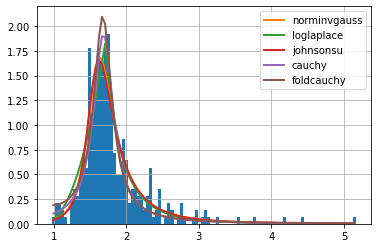

In [15]:
f=Fitter(windSpeed_data)
f.fit()
#may take sometime, since by default it tries all the 80 distributions.
#Then it finds the best 5 fits, by selecting the ones with 
#the lowest  sse(sum square error)
f.summary()         

,sumsquare_error,aic,bic,kl_div
norminvgauss,1.93139,620.597244,-1703.966764,inf


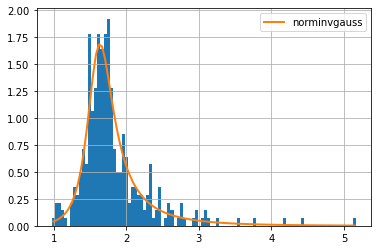

c:\program files (x86)\python37-32\lib\site-packages\scipy\stats\_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


In [18]:
#from our results , on the cell above, norminvgauss is the beat 
#fit with a ssq of 1.931.
#lets use it alone in fitter 
d=Fitter(windSpeed_data,distributions=['norminvgauss'])
d.fit()
d.summary()

In [19]:
# Now we group by just the months and fiinding the average 
#for each.
df_months=df.groupby('month',as_index=False).mean()  
df_months

,month,Unnamed: 0,WindSpeed,WindDir
0,1,22311.0,1.569017,167.988547
1,2,64739.0,1.951183,154.489590
2,3,107056.5,1.947394,159.157979
3,4,150851.5,2.171208,164.982720
4,5,194760.5,2.407888,177.659845
5,6,238526.0,1.980609,168.037529
6,7,281046.0,1.538217,159.252245
7,8,319023.0,1.415652,165.372890
8,9,339901.5,1.527249,172.354932
9,10,366137.0,1.673735,147.628681


c:\program files (x86)\python37-32\lib\site-packages\scipy\stats\_continuous_distns.py:4357: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


In [21]:
windSpeed_data_months=df_months['WindSpeed'] # getting the windspeed  column
windSpeed_data_months


0     1.569017
1     1.951183
2     1.947394
3     2.171208
4     2.407888
5     1.980609
6     1.538217
7     1.415652
8     1.527249
9     1.673735
10    1.664970
11    1.678511
Name: WindSpeed, dtype: float64

,sumsquare_error,aic,bic,kl_div
gennorm,867.539235,235.829857,58.823769,inf
johnsonsb,979.997847,227.735797,62.771351,inf
arcsine,980.935925,32.079378,57.813019,inf
dgamma,994.765941,119.496670,60.465930,inf
beta,1003.776585,34.936604,63.059044,inf


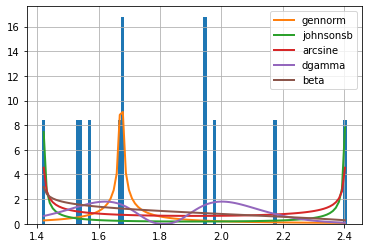

In [22]:
f=Fitter(windSpeed_data_months) # fitting for the months
f.fit()
#may take sometime, since by default it tries all the 80 distributions.
#Then it finds the best 5 fits, by selecting the ones with 
#the lowest  sse(sum square error)
f.summary() 

In [23]:
# from the above cell , the sum square errors are way too large , even for the best fit .

,sumsquare_error,aic,bic,kl_div
exponweib,0.084274,543.990246,-116803.415157,inf
gengamma,0.084457,543.179216,-116781.642538,inf
nakagami,0.092416,527.506145,-115890.371646,inf
chi,0.092418,527.511467,-115890.157218,inf
weibull_min,0.100407,524.876138,-115060.999544,inf


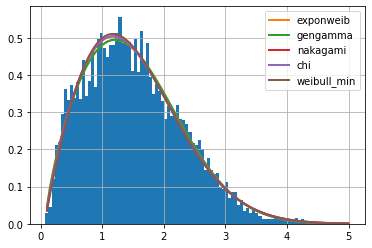

In [28]:
s=Fitter(df['WindSpeed'][:10000]) # tried with only the first  10,000 values
s.fit()
s.summary()

,sumsquare_error,aic,bic,kl_div
anglit,inf,inf,inf,inf
ncx2,inf,inf,inf,inf
nct,inf,inf,inf,inf
ncf,inf,inf,inf,inf
nakagami,inf,inf,inf,inf


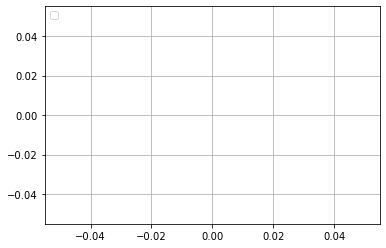

c:\program files (x86)\python37-32\lib\site-packages\scipy\stats\_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


In [31]:
s=Fitter(df['WindSpeed']) # tried for all the values  of the winnspeed and didnt find a best  fit  
s.fit()
s.summary()

In [32]:
#Now for the winddir
windDir_data=df_days['WindDir'] # getting the windspeed  column
windDir_data


0      118.871076
1      162.897190
2      179.649948
3      229.649942
4      170.641470
          ...    
330    166.252430
331    134.740332
332    148.066781
333    141.961253
334    138.414160
Name: WindDir, Length: 335, dtype: float64

,sumsquare_error,aic,bic,kl_div
exponnorm,0.001350,1178.944867,-4143.788758,inf
genlogistic,0.001351,1176.353636,-4143.609491,inf
burr,0.001353,1175.294577,-4137.253730,inf
mielke,0.001353,1175.286734,-4137.249521,inf
johnsonsu,0.001354,1184.052690,-4137.102346,inf


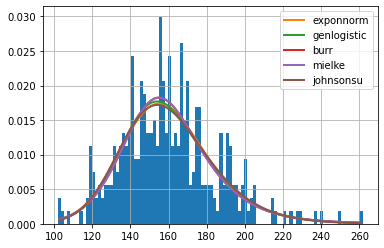

In [33]:
f=Fitter(windDir_data)
f.fit()
#may take sometime, since by default it tries all the 80 distributions.
#Then it finds the best 5 fits, by selecting the ones with 
#the lowest  sse(sum square error)
f.summary() 

,sumsquare_error,aic,bic,kl_div
exponnorm,0.00135,1178.944867,-4143.788758,inf


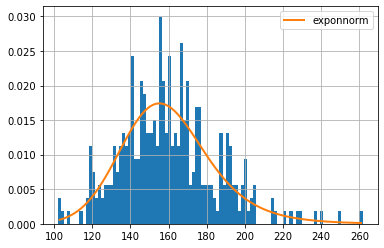

In [35]:
#from our results , on the cell above, exponnorm is the best 
#fit with a ssq of 0.00135
#lets use it alone in fitter 
d=Fitter(windDir_data,distributions=['exponnorm'])
d.fit()
d.summary()

In [36]:
windDir_data_months=df_months['WindDir'] # getting the windspeed  column
windDir_data_months

0     167.988547
1     154.489590
2     159.157979
3     164.982720
4     177.659845
5     168.037529
6     159.252245
7     165.372890
8     172.354932
9     147.628681
10    150.140491
11    144.985094
Name: WindDir, dtype: float64

,sumsquare_error,aic,bic,kl_div
johnsonsb,0.907196,961.496459,-21.048010,inf
arcsine,0.928417,759.993917,-25.740357,inf
rdist,0.930983,758.844720,-23.222330,inf
kappa4,0.945958,705.545759,-20.545935,inf
tukeylambda,0.946463,705.261242,-23.024439,inf


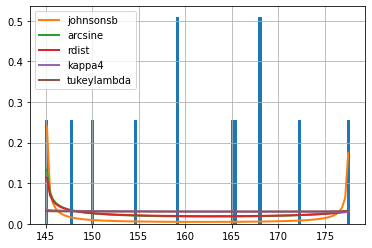

In [37]:
f=Fitter(windDir_data_months) # fitting for the months
f.fit()
#may take sometime, since by default it tries all the 80 distributions.
#Then it finds the best 5 fits, by selecting the ones with 
#the lowest  sse(sum square error)
f.summary() 

,sumsquare_error,aic,bic,kl_div
johnsonsb,0.907196,961.496459,-21.04801,inf


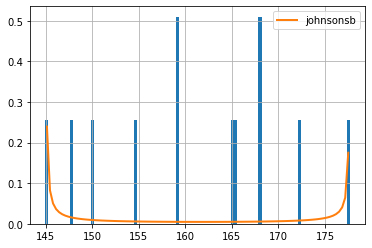

c:\program files (x86)\python37-32\lib\site-packages\scipy\stats\_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


In [38]:
#From the cell above the bes fit is johnsonsb
f=Fitter(windDir_data_months,distributions=['johnsonsb']) 
f.fit()
f.summary() 

,sumsquare_error,aic,bic,kl_div
anglit,inf,inf,inf,inf
ncx2,inf,inf,inf,inf
nct,inf,inf,inf,inf
ncf,inf,inf,inf,inf
nakagami,inf,inf,inf,inf


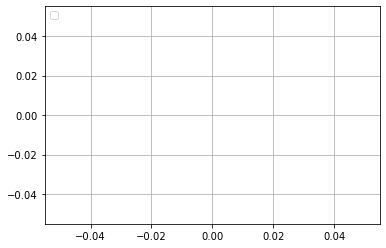

In [39]:
s=Fitter(df['WindDir']) # tried for all the values  of the winddir and didnt find a best  fit  
s.fit()
s.summary()

c:\program files (x86)\python37-32\lib\site-packages\scipy\stats\_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


,sumsquare_error,aic,bic,kl_div
uniform,0.000128,1175.976730,-181746.048886,0.092248
semicircular,0.000177,1187.219283,-178469.626142,0.083199
anglit,0.000215,1197.014248,-176513.019059,0.109706
cosine,0.000232,1203.889083,-175777.397857,0.122337
expon,0.000237,1238.067972,-175560.497162,0.191674


c:\program files (x86)\python37-32\lib\site-packages\scipy\stats\_continuous_distns.py:4357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  intg = integrate.quad(f, -xi, np.pi/2, **intg_kwargs)[0]


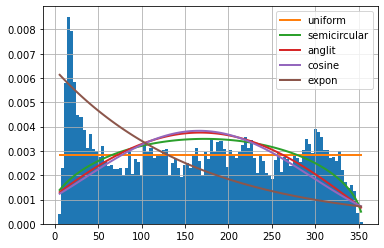

In [40]:
s=Fitter(df['WindDir'][:10000]) # tried for all the values  of the winddir and didnt find a best  fit  
s.fit()
#will take sometime
s.summary()

In [41]:
#  from the cell above the best fit for the first 10,000 data is a uniform distribution 